In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
#import nltk
import spacy
import sklearn
import numpy as np

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train_size = len(train)
test_size = len(test)
print("Train size: ", train_size)
print("Test size: ", test_size, " - ", test_size*100/train_size, "% of train size")

Train size:  20000000
Test size:  246955  -  1.234775 % of train size


In [4]:
test.head()

,id,title,language
0,0,Kit Maternidade Bolsa-mala Baby/bebe Vinho Men...,portuguese
1,1,Trocador De Fraldas Fisher Price Feminino Rosa...,portuguese
2,2,Motor Ventoinha - Fiat Idea / Palio 1.8 - A 04...,portuguese
3,3,Amortecedor Mola Batente D Dir New Civic 14 - ...,portuguese
4,4,Cadeirinha De Carro Bebê Princesa Princess 9 A...,portuguese


In [5]:
label_quality_types = train['label_quality'].unique()
language_types = train['language'].unique()
category_types = train['category'].unique()
print("label_quality: ", label_quality_types)
print("languages: ", language_types)
print("Number of categories: ", len(category_types))

label_quality:  ['unreliable' 'reliable']
languages:  ['spanish' 'portuguese']
Number of categories:  1588


unreliable    18815755
reliable       1184245
Name: label_quality, dtype: int64
Percentages:  [94.078775  5.921225]


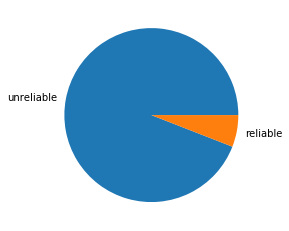

In [6]:
label_quality_freq = train['label_quality'].value_counts()
print(label_quality_freq)
print('Percentages: ', label_quality_freq.values*100/np.sum(label_quality_freq.values))
plt = matplotlib.pyplot.pie(label_quality_freq.values, labels=label_quality_freq.index)

In [7]:
languages_freq = train['language'].value_counts()
print(languages_freq)
print('Percentages: ', languages_freq.values/np.sum(languages_freq.values))

spanish       10000000
portuguese    10000000
Name: language, dtype: int64
Percentages:  [0.5 0.5]


In [8]:
port_quality_freq = train[train['language'] == 'portuguese']['label_quality'].value_counts()
esp_quality_freq = train[train['language'] == 'spanish']['label_quality'].value_counts()
quality_freq_per_lang = pd.DataFrame({'Portuguese': port_quality_freq*100/train_size, 'Spanish:': esp_quality_freq*100/train_size})
quality_freq_per_lang

,Portuguese,Spanish:
unreliable,46.53341,47.545365
reliable,3.46659,2.454635


In [9]:
languages_freq_test = test['language'].value_counts()
print(languages_freq_test)
print('Percentages: ', languages_freq_test.values/np.sum(languages_freq_test.values))

spanish       124987
portuguese    121968
Name: language, dtype: int64
Percentages:  [0.50611245 0.49388755]


In [10]:
category_freq = train['category'].value_counts()
category_freq = pd.DataFrame({'Qntd':  category_freq.values, 'Percentage': category_freq.apply(lambda x: '{0} %'.format(x*100/train_size))})
print(category_freq.head(8), '\n...\n')
print(category_freq.tail(8))
print('\n', category_freq['Qntd'].describe())

                    Qntd  Percentage
PANTS              35973  0.179865 %
COFFEE_MAKERS      35104   0.17552 %
BABY_CAR_SEATS     34163  0.170815 %
MUSICAL_KEYBOARDS  33222   0.16611 %
MATTRESSES         32967  0.164835 %
PUREBRED_DOGS      32928   0.16464 %
RANGES             32645  0.163225 %
REFRIGERATORS      32635  0.163175 % 
...

                                      Qntd  Percentage
STADIOMETERS                           229  0.001145 %
HONEY_EXTRACTORS                       216   0.00108 %
FORCE_GAUGES                           213  0.001065 %
CONSTRUCTION_LIME_BAGS                 206   0.00103 %
COLD_FOOD_AND_DRINK_VENDING_MACHINES   162   0.00081 %
PAINTBALL_SMOKE_GRENADES               154   0.00077 %
COMMERCIAL_POPCORN_MACHINES            141  0.000705 %
HAMBURGER_FORMERS                      109  0.000545 %

 count     1588.000000
mean     12594.458438
std       8218.029504
min        109.000000
25%       5042.750000
50%      12399.500000
75%      19104.750000
max      3

[]

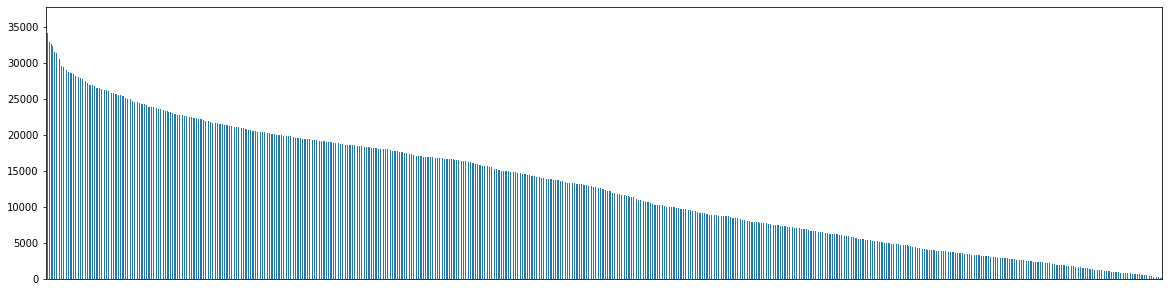

In [11]:
fig, axes = matplotlib.pyplot.subplots(figsize=(20, 5), nrows=1, ncols=1)
category_freq['Qntd'].plot(kind='bar', ax=axes).get_xaxis().set_ticks([])

In [12]:
cat_freq_port = train[train['language'] == 'portuguese']['category'].value_counts()[category_freq.index].fillna(0)
cat_freq_esp = train[train['language'] == 'spanish']['category'].value_counts()[category_freq.index].fillna(0)
cat_freq_unrel = train[train['label_quality'] == 'unreliable']['category'].value_counts()[category_freq.index].fillna(0)
cat_freq_rel = train[train['label_quality'] == 'reliable']['category'].value_counts()[category_freq.index].fillna(0)

[]

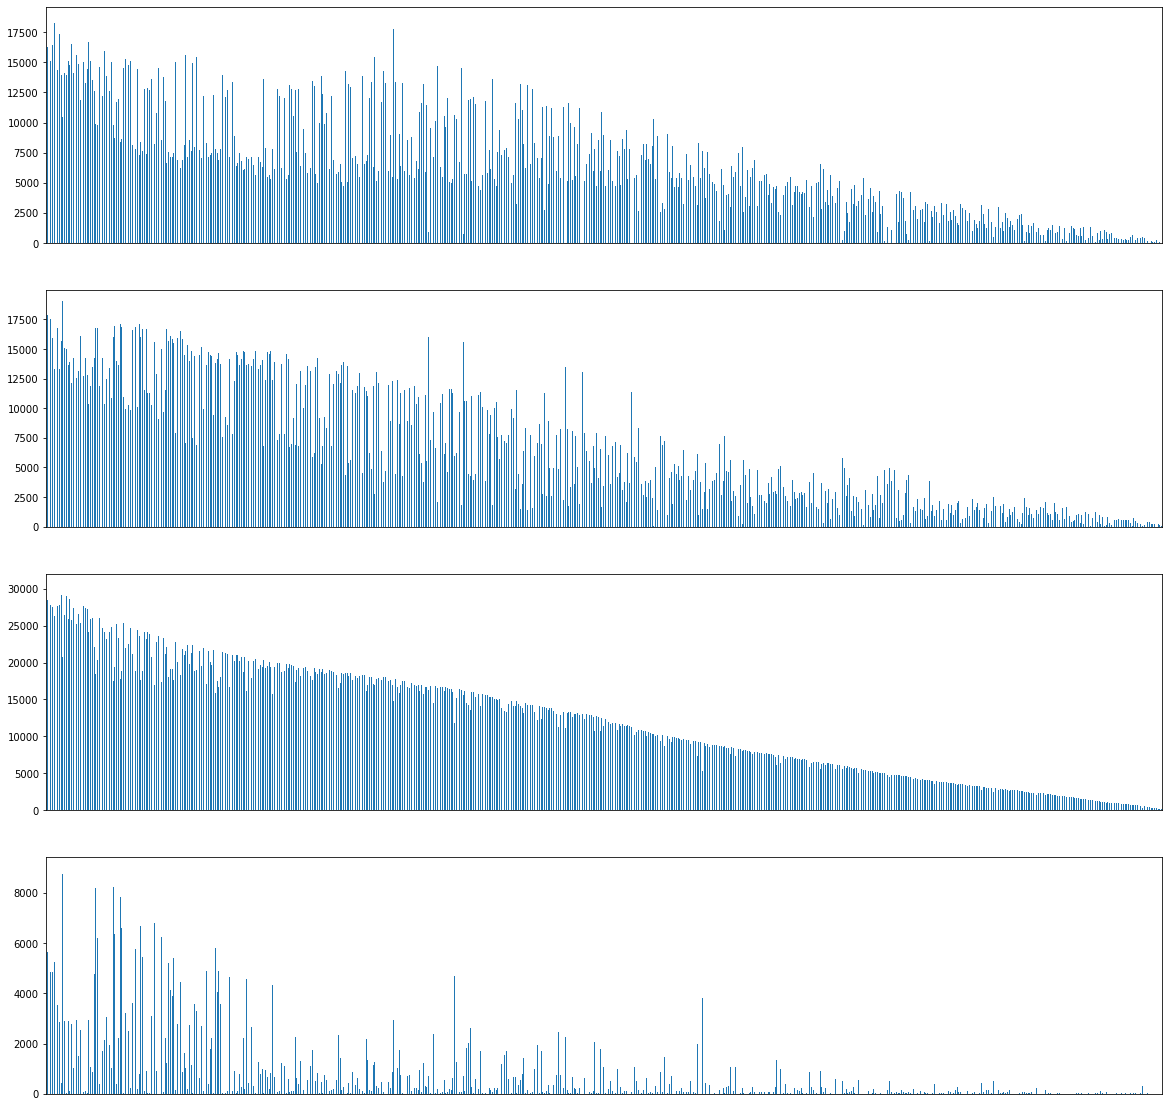

In [13]:
fig, axes = matplotlib.pyplot.subplots(figsize=(20, 20), nrows=4, ncols=1)
cat_freq_port.plot(kind='bar', ax=axes[0]).get_xaxis().set_ticks([])
cat_freq_esp.plot(kind='bar', ax=axes[1]).get_xaxis().set_ticks([])
cat_freq_unrel.plot(kind='bar', ax=axes[2]).get_xaxis().set_ticks([])
cat_freq_rel.plot(kind='bar', ax=axes[3]).get_xaxis().set_ticks([])

In [14]:
abs(cat_freq_port - cat_freq_esp)

PANTS                                   1405.0
COFFEE_MAKERS                            110.0
BABY_CAR_SEATS                          1583.0
MUSICAL_KEYBOARDS                       1912.0
MATTRESSES                              1653.0
                                         ...  
CONSTRUCTION_LIME_BAGS                   206.0
COLD_FOOD_AND_DRINK_VENDING_MACHINES      50.0
PAINTBALL_SMOKE_GRENADES                 154.0
COMMERCIAL_POPCORN_MACHINES               69.0
HAMBURGER_FORMERS                         63.0
Name: category, Length: 1588, dtype: float64

In [15]:
cat_freq_port_norm = cat_freq_port/category_freq['Qntd']
print('N Categories only in portuguese:' ,cat_freq_port_norm[cat_freq_port_norm == 1.00].count())
print('N Categories only in spanish:' ,cat_freq_port_norm[cat_freq_port_norm == 0.00].count())

N Categories only in portuguese: 14
N Categories only in spanish: 12


In [19]:
cat_freq_rel_norm = cat_freq_rel/category_freq['Qntd']
print('N Categories only in reliable:' ,cat_freq_rel_norm[cat_freq_rel_norm == 1.00].count())
print('N Categories only in non-reliable:' ,cat_freq_rel_norm[cat_freq_rel_norm == 0.00].count())

N Categories only in reliable: 0
N Categories only in non-reliable: 193


In [86]:
rel_cats_filters = cat_freq_rel[cat_freq_rel == 0].index

[]

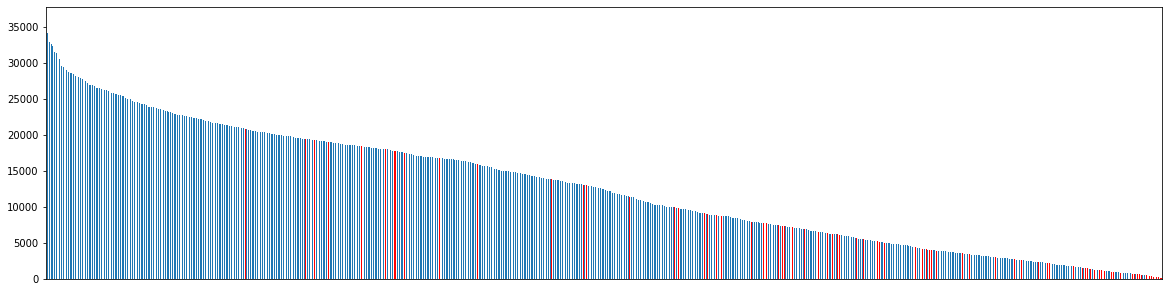

In [83]:
fig, axes = matplotlib.pyplot.subplots(figsize=(20, 5), nrows=1, ncols=1)
category_freq_qtnd = category_freq['Qntd'].copy()
category_freq_negative = category_freq['Qntd'].copy()
def conv(x):
    if(x.name in rel_cats_filters):
        x[0] = 0
    return x
def conv_neg(x):
    if(x.name not in rel_cats_filters):
        x[0] = 0
    return x
category_freq_qtnd = category_freq_qtnd.to_frame(0).apply(conv, axis=1)[0]
category_freq_qtnd.plot(kind='bar', ax=axes).get_xaxis().set_ticks([])
category_freq_negative = category_freq_negative.to_frame(0).apply(conv_neg, axis=1)[0]
category_freq_negative.plot(kind='bar', ax=axes, color='r').get_xaxis().set_ticks([])

In [99]:
cat_freq_rel_lang = train[train['label_quality'] == 'reliable'][['category', 'language']]
cat_freq_rel_pt = cat_freq_rel_lang[cat_freq_rel_lang['language'] == 'portuguese']['category'].value_counts()[category_freq.index].fillna(0)
cat_freq_rel_es = cat_freq_rel_lang[cat_freq_rel_lang['language'] == 'spanish']['category'].value_counts()[category_freq.index].fillna(0)

In [101]:
print('N Categories not in pt reliable:' ,cat_freq_rel_pt[cat_freq_rel_pt == 0.00].count())
print('N Categories not in es reliable:' ,cat_freq_rel_es[cat_freq_rel_es == 0.00].count())

N Categories not in pt reliable: 408
N Categories not in es reliable: 526


In [102]:
with open('./da')
cat_freq_rel_pt[cat_freq_rel_pt == 0.00].index

Index(['SWEATERS_AND_CARDIGANS', 'CHOCOLATES', 'CAR_CARBURETORS',
       'WRENCH_SETS', 'SOUND_CONSOLES_AND_DJ_MIXERS', 'CLASSIC_CARS',
       'CONCERT_TICKETS', 'DECORATIVE_PAINTINGS', 'PACKAGING_BOXES',
       'FIDGET_SPINNERS',
       ...
       'BOXING_SPEED_BAGS', 'MANUAL_TROLLEYS', 'SCALE_RULERS',
       'QUEUE_STANCHIONS', 'FORCE_GAUGES', 'CONSTRUCTION_LIME_BAGS',
       'COLD_FOOD_AND_DRINK_VENDING_MACHINES', 'PAINTBALL_SMOKE_GRENADES',
       'COMMERCIAL_POPCORN_MACHINES', 'HAMBURGER_FORMERS'],
      dtype='object', length=408)

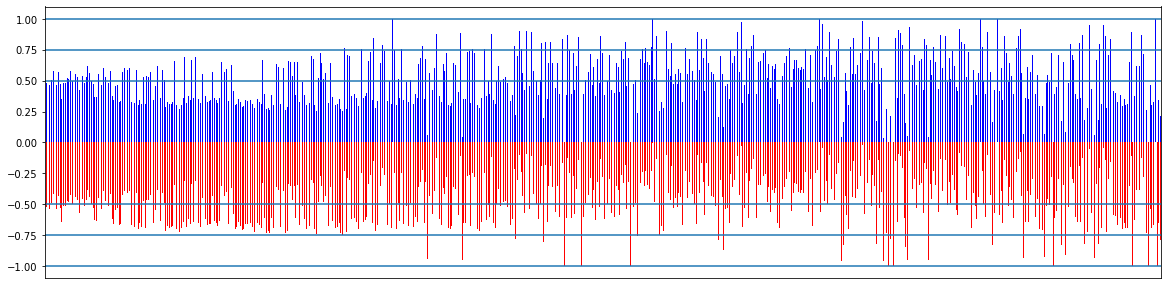

In [16]:
fig, axes = matplotlib.pyplot.subplots(figsize=(20, 5), nrows=1, ncols=1)
(cat_freq_port/category_freq['Qntd']).plot(kind='bar', color='b', ax=axes).get_xaxis().set_ticks([])
(cat_freq_esp*-1/category_freq['Qntd']).plot(kind='bar', color='r', ax=axes).get_xaxis().set_ticks([])
axes.axhline(0.5)
axes.axhline(0.75)
axes.axhline(1)
axes.axhline(-0.75)
axes.axhline(-0.5)
axes.axhline(-1)

In [17]:
(cat_freq_rel/category_freq['Qntd']).sort_values(ascending=False)

INDUSTRIAL_BLENDERS                0.527241
MUSICAL_KEYBOARD_CASES_AND_BAGS    0.418224
FOOTBALL_SHIRTS                    0.321192
JACKETS_AND_COATS                  0.320763
HANDBAGS                           0.319983
                                     ...   
GARDEN_CHAIRS                      0.000000
INDUSTRIAL_COOKING_OVENS           0.000000
ARTIFICIAL_FEATHERS                0.000000
DOOR_AND_GATE_REMOTE_CONTROLS      0.000000
HAMBURGER_FORMERS                  0.000000
Length: 1588, dtype: float64

In [18]:
train['length'] = train['title'].apply(len)
test['length'] = test['title'].apply(len)
print('Train: \n', train['length'].describe().apply(lambda x: format(x, 'g')))
print('\nTest: \n', test['length'].describe().apply(lambda x: format(x, 'g')))

Train: 
 count      2e+07
mean     47.8666
std      12.2868
min            3
25%           40
50%           52
75%           58
max          120
Name: length, dtype: object

Test: 
 count     246955
mean     49.0328
std      11.6908
min            3
25%           43
50%           54
75%           58
max           60
Name: length, dtype: object


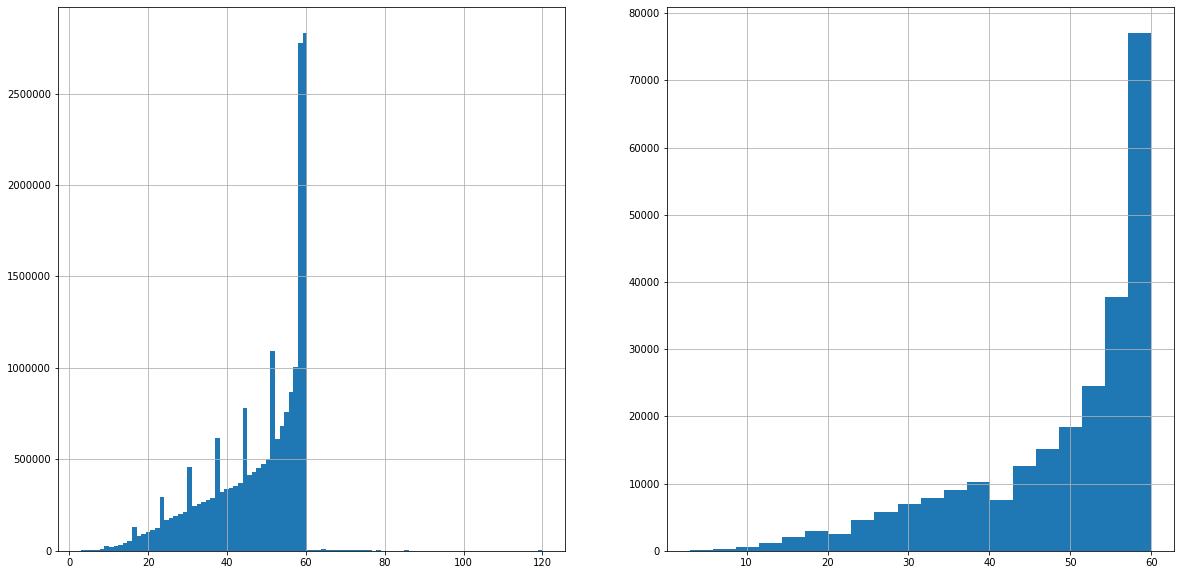

In [15]:
fig, axes = matplotlib.pyplot.subplots(figsize=(20, 10), nrows=1, ncols=2)
train['length'].hist(bins=100, ax=axes[0])
test['length'].hist(bins=20, ax=axes[1])

In [16]:
len_gt_60 = train[train['length'] > 60]
print('Len > 60: ', len(len_gt_60), ' - ', len(len_gt_60)*100/train_size, '% of the dataset' )
len_gt_60.head()

Len > 60:  81113  -  0.405565 % of the dataset


,title,label_quality,language,category,length
620,Tecla Levantacristal Derecha Original Fiat Str...,unreliable,spanish,CAR_WINDOW_SWITCHES,79
1266,Bomba Direccion Hidraulica Fiat Nuevo Palio Fa...,unreliable,spanish,CAR_POWER_STEERING_PUMPS,64
1284,"Árvore De Natal Dinamarca Verde 1,8 Metros 580...",unreliable,portuguese,CHRISTMAS_TREES,73
1449,Leve Junto! 50 Protetores Auriculares De Silic...,unreliable,portuguese,SWIMMING_EARPLUGS,81
1738,Suéter Feminino Linha Feito Em Tricô Decote V ...,unreliable,portuguese,SWEATERS_AND_CARDIGANS,63


In [17]:
print(len_gt_60['label_quality'].value_counts(), '\n')
print(len_gt_60['language'].value_counts(), '\n')
print(len_gt_60['category'].value_counts())

unreliable    81113
Name: label_quality, dtype: int64 

spanish       45221
portuguese    35892
Name: language, dtype: int64 

LAPTOP_BATTERIES                       1591
HOUSE_FENCES                            828
DESKTOP_COMPUTER_COOLERS_AND_FANS       788
DECORATIVE_PAINTINGS                    673
MATTRESSES                              563
MICROMETERS                             557
AUTOMOTIVE_SUSPENSION_CONTROL_ARMS      535
LATEX_ENAMEL_AND_ACRYLIC_PAINTS         445
SUITCASES                               441
CAR_WINDOW_SWITCHES                     422
PORTABLE_GENERATORS                     413
BOX_SPRING_AND_MATTRESS_SETS            398
OFFICE_CHAIRS                           366
AUTOMOTIVE_BATTERIES                    345
CELLPHONE_BATTERIES                     344
SURVEILLANCE_MONITORING_KITS            343
ENGINE_CRANKSHAFT_PULLEYS               321
SCREWS                                  311
ELECTRIC_DRILLS                         301
CAR_SCANNERS                         

In [ ]:
import util
from joblib import load
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
train_preprocessed = pd.read_csv('data/train_preprocessed.csv')

In [3]:
train_preprocessed['qntd_tokens'] = train_preprocessed['title'].apply(lambda x: str(x).count(' ')+1)

In [4]:
train_preprocessed['qntd_tokens'].describe().apply(lambda x: format(x, 'g'))

count      2e+07
mean     5.63847
std      1.87082
min            1
25%            4
50%            6
75%            7
max           31
Name: qntd_tokens, dtype: object

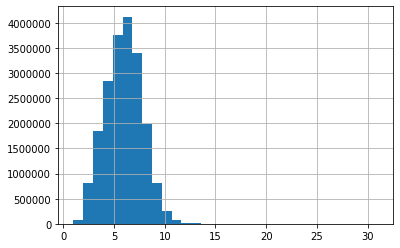

In [8]:
train_preprocessed['qntd_tokens'].hist(bins=31)

In [6]:
(train_preprocessed['qntd_tokens'].value_counts().sort_index().cumsum())*100/len(train_preprocessed['qntd_tokens'])

1       0.405690
2       4.434205
3      13.669580
4      27.865630
5      46.641755
6      67.260590
7      84.263520
8      94.169695
9      98.239660
10     99.503170
11     99.840135
12     99.932215
13     99.965240
14     99.981630
15     99.990465
16     99.995220
17     99.997545
18     99.998550
19     99.999190
20     99.999600
21     99.999840
22     99.999920
23     99.999965
24     99.999970
25     99.999975
26     99.999985
27     99.999990
31    100.000000
Name: qntd_tokens, dtype: float64